## Histogram
A simple histogram can be a great first step in understanding a dataset

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')
data =np.random.randn(1000)

(array([  7.,  20.,  83., 165., 252., 236., 137.,  61.,  30.,   9.]),
 array([-3.11374887, -2.48921137, -1.86467386, -1.24013636, -0.61559886,
         0.00893864,  0.63347614,  1.25801364,  1.88255114,  2.50708864,
         3.13162614]),
 <a list of 10 Patch objects>)

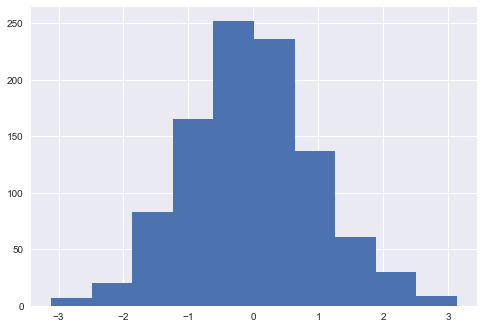

In [5]:
plt.hist(data)

(array([  3.,  12.,  56., 152., 274., 273., 170.,  46.,  10.,   4.]),
 array([-3.52997295, -2.82863395, -2.12729495, -1.42595594, -0.72461694,
        -0.02327794,  0.67806107,  1.37940007,  2.08073907,  2.78207807,
         3.48341708]),
 <a list of 10 Patch objects>)

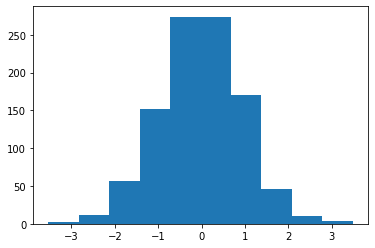

In [2]:
plt.hist(data)

A customized histogram


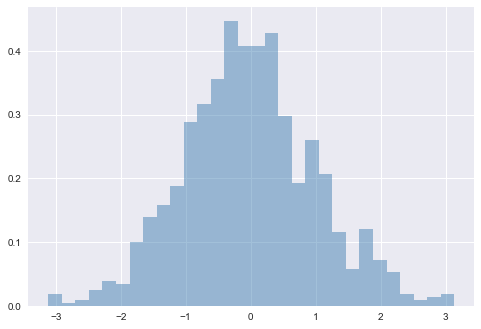

In [30]:
# hist function has many options to tune both calculation and display
plt.hist(data,bins=30,density=True,alpha=0.5,histtype='stepfilled',
        color='steelblue',edgecolor='none')
print("A customized histogram")

The plt.hist docstring has more information on other customization options available. I find this combination of histtype='stepfilled' along with some transparency alpha to be very useful when comparing histograms of several distributions 

over plotting multiple histogram


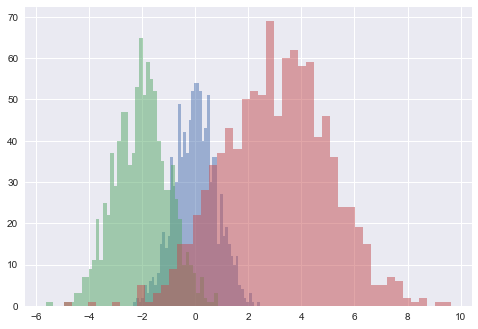

In [29]:
x1=np.random.normal(0,0.8,1000)
x2=np.random.normal(-2,1,1000)
x3=np.random.normal(3,2,1000)

kwargs=dict(histtype='stepfilled',alpha=0.5,bins=48)

plt.hist(x1,**kwargs)
plt.hist(x2,**kwargs)
plt.hist(x3,**kwargs)
print("over plotting multiple histogram")

In [18]:
#count the bin
counts,bin_edges=np.histogram(data,bins=5)
counts

array([ 27, 248, 488, 198,  39], dtype=int64)

## Two dimentional Histogram and Binnings

Just as we create histograms in one dimension by dividing the number line into bins, we can also create histograms in two dimensions by dividing points among twodimensional bins. We’ll take a brief look at several ways to do this here. We’ll start by defining some data—an x and y array drawn from a multivariate Gaussian distribution:


In [19]:
mean=[0,0]
cov=[[1,1],[1,2]]
x,y=np.random.multivariate_normal(mean,cov,1000).T

In [22]:
x.shape ,y.shape

((1000,), (1000,))

### plt.hist2d : two dimentional histogram

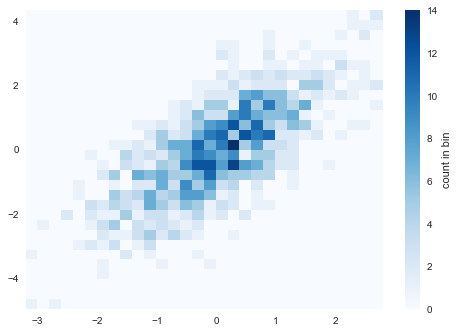

In [26]:
plt.hist2d(x,y,bins=30,cmap='Blues')
cb=plt.colorbar()
cb.set_label('count in bin')

In [33]:
# plt.hist has a counterpart in np.histogram, 
# plt.hist2d has a counterpart in np.histogram2d
counts,xedges,yedges=np.histogram2d(x,y,bins=30)
counts.shape


(30, 30)

### plt.hexbin : Hexagonal binnings

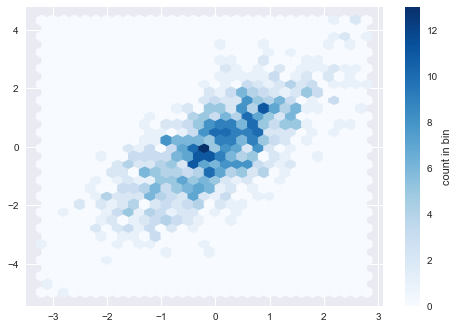

In [40]:
plt.hexbin(x,y,gridsize=30,cmap='Blues')
cb=plt.colorbar(label='count in bin')

plt.hexbin has a number of interesting options, including the ability to specify weights for each point, and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc.).


## kernel density estimation (KDE)

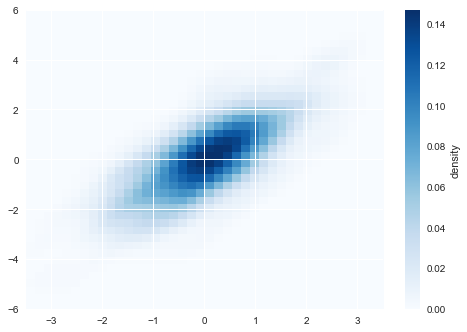

In [50]:
from scipy.stats import gaussian_kde

#fit an array of size [Ndim,Nsamples]
data=np.vstack([x,y])
kde=gaussian_kde(data)

# evaluate on a regular grid
xgrid=np.linspace(-3.5,3.5,40)
ygrid=np.linspace(-6,6,40)
Xgrid,Ygrid=np.meshgrid(xgrid,ygrid)
Z=kde.evaluate(np.vstack([Xgrid.ravel(),Ygrid.ravel()]))

#plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),origin='lower',aspect='auto',
          extent=[-3.5,3.5,-6,6],cmap='Blues')
cb=plt.colorbar()
cb.set_label('density')
